# Import Prerequisites

In [ ]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

# machine learning
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #|=> MSE(The less the better)
                                                                              #|=> MAE(The less the better)
                                                                              #|=> R2(The more the better)

# Load Dataset

In [ ]:
data=load_wine().data
target=load_wine().target
f_names=load_wine().feature_names
f_targets=load_wine().target_names

In [ ]:
df = pd.DataFrame(data, columns=f_names)


# Understand Data


1. Describe Data

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.info()

2. EDA - Descriptive

In [ ]:
df.isna().sum().sum()
df.dropna()

In [ ]:
df.duplicated()
df.drop_duplicates()

3. EDA-Viz

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True);

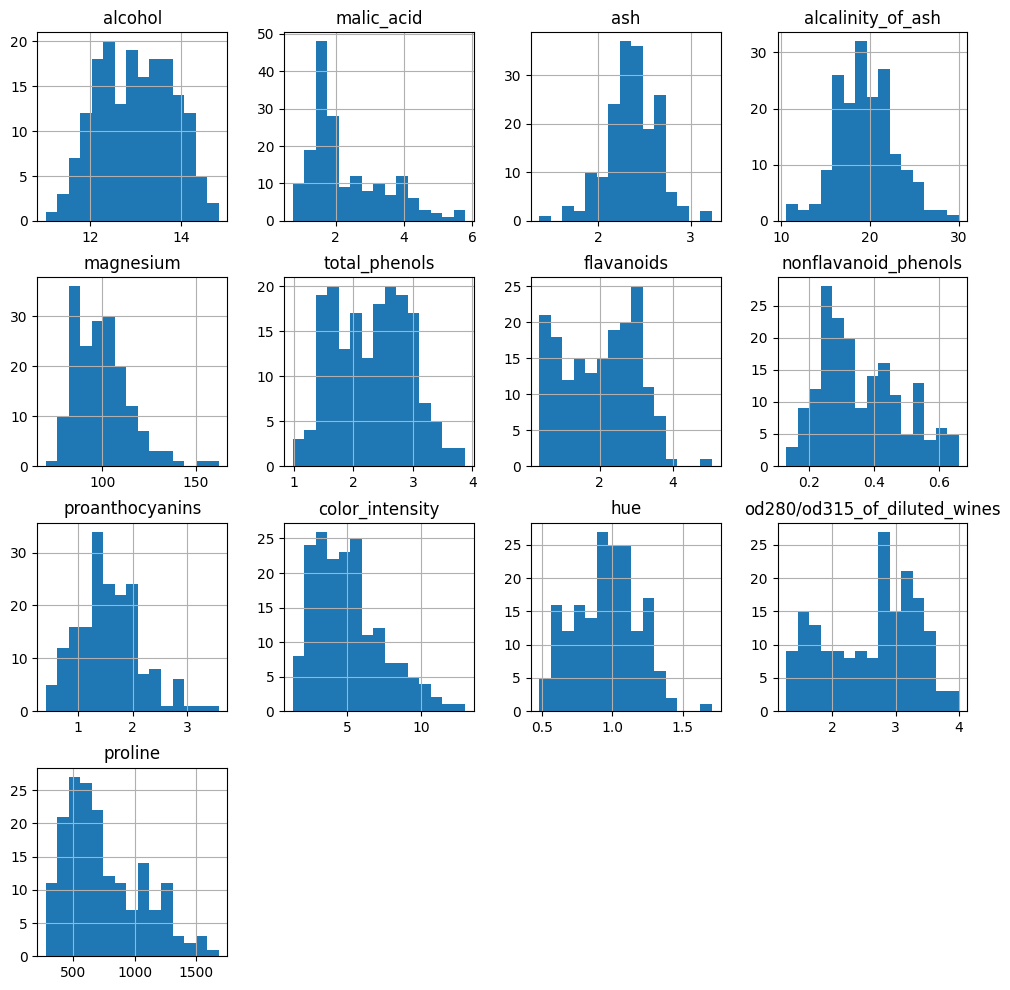

In [ ]:
df.hist(bins=15,figsize=(12,12))
plt.show()

In [ ]:
y = df["alcalinity_of_ash"] #==> target
X = df.drop('alcalinity_of_ash',axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  shuffle=True,
                                                  test_size=0.2)

In [ ]:
mms=MinMaxScaler()
mms.fit(X_train)# 2:30
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [ ]:
neighbors=dict()
for i in range(2,20):
    knn_reg = KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    y_pred = knn_reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    neighbors[i]="{:.2f}".format(r2)
    print(f'n_neighbors: {i}, r2: {"{:.2f}".format(r2)}, MAE: {"{:.2f}".format(mae)}, MSA:{"{:.2f}".format(mse)}')

n_neighbors: 2, r2: 0.23, MAE: 2.78, MSA:12.61
n_neighbors: 3, r2: 0.30, MAE: 2.57, MSA:11.48
n_neighbors: 4, r2: 0.30, MAE: 2.62, MSA:11.41
n_neighbors: 5, r2: 0.32, MAE: 2.48, MSA:11.04
n_neighbors: 6, r2: 0.29, MAE: 2.51, MSA:11.67
n_neighbors: 7, r2: 0.29, MAE: 2.46, MSA:11.54
n_neighbors: 8, r2: 0.29, MAE: 2.43, MSA:11.62
n_neighbors: 9, r2: 0.27, MAE: 2.45, MSA:11.92
n_neighbors: 10, r2: 0.27, MAE: 2.47, MSA:11.98
n_neighbors: 11, r2: 0.24, MAE: 2.53, MSA:12.48
n_neighbors: 12, r2: 0.25, MAE: 2.49, MSA:12.34
n_neighbors: 13, r2: 0.22, MAE: 2.49, MSA:12.70
n_neighbors: 14, r2: 0.23, MAE: 2.47, MSA:12.63
n_neighbors: 15, r2: 0.23, MAE: 2.50, MSA:12.62
n_neighbors: 16, r2: 0.23, MAE: 2.50, MSA:12.65
n_neighbors: 17, r2: 0.24, MAE: 2.49, MSA:12.43
n_neighbors: 18, r2: 0.23, MAE: 2.52, MSA:12.54
n_neighbors: 19, r2: 0.25, MAE: 2.48, MSA:12.24
